In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('Solarize_Light2')

In [9]:
np.random.seed(29)
x = np.random.randn(200)

In [10]:
y = x * 10 + np.random.randn(200) * 2

In [11]:
data = pd.DataFrame([x, y]).T

In [12]:
data.columns = ['x', 'y']

In [13]:
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 23.80000000000001, 'Independent variable')

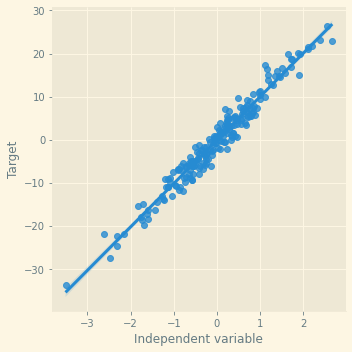

In [14]:
sns.lmplot(x="x", y="y", data=data, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [16]:
linreg = LinearRegression()
# Sciki-learn predictor classes do not take pandas Series 
# as arguments. Because data['x'] is a pandas Series, we need
# to convert it into a dataframe using to_frame().
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

In [17]:
predictions = linreg.predict(data['x'].to_frame())

In [18]:
residuals = data['y'] - predictions

Text(0.5, 0, 'Independent variable x')

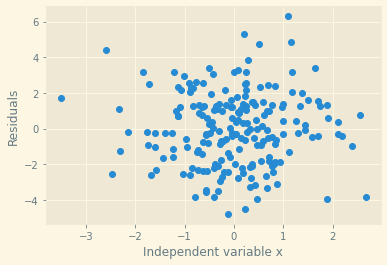

In [19]:
plt.scatter(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

/home/ajay/miniconda/envs/feature_engineering/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

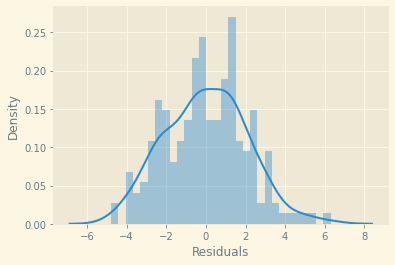

In [20]:
sns.distplot(residuals, bins=30)
plt.xlabel('Residuals')

# Real World Examples

In [21]:
from sklearn.datasets import load_boston

In [22]:
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



This is the information about the boston house prices datasets
the aim is to predict the 'Median value of the houses' 
MEDV column of this dataset

and we have variables with characteristics about the homes and the neighborhoods


In [24]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

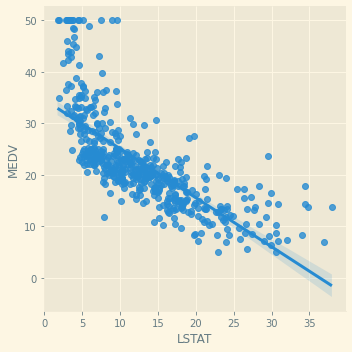

In [25]:
sns.lmplot(x='LSTAT', y='MEDV', data=boston, order=1)

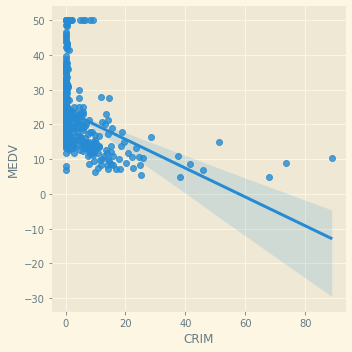

In [26]:
# Now we plot CRIM (per capita crime rate by town)
# vs the target MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

Linear relationships can also be assessed by evaluating the residuals. Residuals are the difference between the value estimated by the linear relationship and the real output. If the relationship is linear, the residuals should be normally distributed and centered around zero.

Text(0, 0.5, 'MEDV')

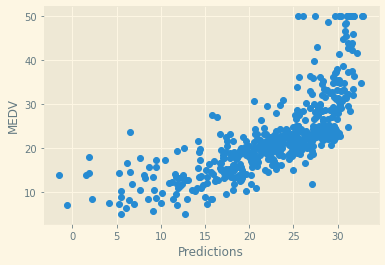

In [28]:
linreg = LinearRegression()

linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# Make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

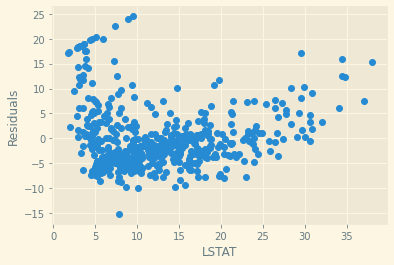

In [29]:
# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follows a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

/home/ajay/miniconda/envs/feature_engineering/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

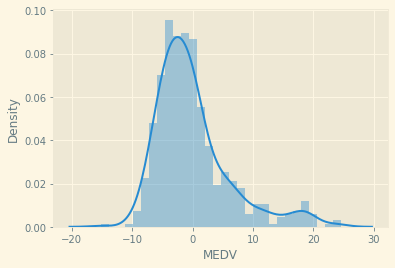

In [30]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

For this particular case, the residuals are centered around zero, but they are not homegeneously distributed across the values of LSTAT. Bigger and smaller values of LSTAT show higher residual values. In addition, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.